In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

from functools import reduce

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/0db0ed38-868c-40d2-bcbd-bcedb88543cf/sample_submission.csv
/kaggle/input/0db0ed38-868c-40d2-bcbd-bcedb88543cf/engine_metadata.csv
/kaggle/input/0db0ed38-868c-40d2-bcbd-bcedb88543cf/site_metadata.csv
/kaggle/input/0db0ed38-868c-40d2-bcbd-bcedb88543cf/dataset/dataset/data_141.csv
/kaggle/input/0db0ed38-868c-40d2-bcbd-bcedb88543cf/dataset/dataset/data_202.csv
/kaggle/input/0db0ed38-868c-40d2-bcbd-bcedb88543cf/dataset/dataset/data_26.csv
/kaggle/input/0db0ed38-868c-40d2-bcbd-bcedb88543cf/dataset/dataset/data_165.csv
/kaggle/input/0db0ed38-868c-40d2-bcbd-bcedb88543cf/dataset/dataset/data_124.csv
/kaggle/input/0db0ed38-868c-40d2-bcbd-bcedb88543cf/dataset/dataset/data_178.csv
/kaggle/input/0db0ed38-868c-40d2-bcbd-bcedb88543cf/dataset/dataset/data_33.csv
/kaggle/input/0db0ed38-868c-40d2-bcbd-bcedb88543cf/dataset/dataset/data_49.csv
/kaggle/input/0db0ed38-868c-40d2-bcbd-bcedb88543cf/dataset/dataset/data_79.csv
/kaggle/input/0db0ed38-868c-40d2-bcbd-bcedb88543cf/dataset/dataset/data

In [2]:
engine_metadata = pd.read_csv("/kaggle/input/0db0ed38-868c-40d2-bcbd-bcedb88543cf/engine_metadata.csv")
engine_metadata.head()

,CUSTOMER_NAME,PLANT_NAME,ENGINE_ID,FILE_ID
0,SPIFFY,SPIRITUAL-POLECAT,ENGINE_1,data_1.csv
1,SPIFFY,SPIRITUAL-POLECAT,ENGINE_2,data_2.csv
2,SPIFFY,SPIRITUAL-POLECAT,ENGINE_3,data_3.csv
3,NONCHALANT,NIFTY-ROOK,ENGINE_1,data_4.csv
4,NONCHALANT,NIFTY-ROOK,ENGINE_2,data_5.csv


In [3]:
engine_metadata.groupby("ENGINE_ID")["FILE_ID"].apply(list)["ENGINE_1"]

['data_1.csv',
 'data_4.csv',
 'data_9.csv',
 'data_11.csv',
 'data_17.csv',
 'data_23.csv',
 'data_27.csv',
 'data_31.csv',
 'data_36.csv',
 'data_44.csv',
 'data_49.csv',
 'data_51.csv',
 'data_57.csv',
 'data_64.csv',
 'data_66.csv',
 'data_73.csv',
 'data_78.csv',
 'data_85.csv',
 'data_91.csv',
 'data_92.csv',
 'data_96.csv',
 'data_102.csv',
 'data_103.csv',
 'data_110.csv',
 'data_115.csv',
 'data_126.csv',
 'data_133.csv',
 'data_141.csv',
 'data_146.csv',
 'data_154.csv',
 'data_155.csv',
 'data_160.csv',
 'data_167.csv',
 'data_170.csv',
 'data_172.csv',
 'data_176.csv',
 'data_180.csv',
 'data_187.csv',
 'data_191.csv',
 'data_195.csv',
 'data_202.csv',
 'data_204.csv',
 'data_208.csv',
 'data_210.csv']

In [4]:
def sum_df(*args):
    dataframes = []
    for arg in args:
        csv_file = pd.read_csv(f"/kaggle/input/0db0ed38-868c-40d2-bcbd-bcedb88543cf/dataset/dataset/{arg}", index_col=0)
   #     csv_file["Dates"] = pd.to_datetime(csv_file["Dates"])
        csv_file.index.name = "Date"
        csv_file = csv_file.fillna(0)
        csv_file.index = pd.to_datetime(csv_file.index)
        dataframes.append(
            csv_file.fillna(0)
        )
#    return dataframes
    return reduce(lambda x, y: x.add(y, fill_value=0), dataframes)

In [5]:
dfs = sum_df(*engine_metadata.groupby("ENGINE_ID")["FILE_ID"].apply(list)["ENGINE_1"])
dfs

,CMP_SPEED,POWER,FUEL_FLOW,CO2
Date,,,,
2021-01-01 00:00:00,167587.896506,203719.963705,14.437099,37.099493
2021-01-01 01:00:00,167542.574825,203803.822139,14.439533,37.106932
2021-01-01 02:00:00,167566.613236,204013.865381,14.447618,37.126830
2021-01-01 03:00:00,167522.241061,204051.648802,14.445778,37.121096
2021-01-01 04:00:00,167385.288916,203867.666432,14.438368,37.102841
...,...,...,...,...
2021-12-31 20:00:00,265032.380737,376145.319899,24.366896,62.331985
2021-12-31 21:00:00,265068.277060,376582.283981,24.376187,62.355240
2021-12-31 22:00:00,265025.721963,376555.434604,24.369260,62.338078


In [6]:
def multitable_dataframe(df, group, selected_group):
    """Return the sum of the selected tables
    """
    select = df.groupby(group)["FILE_ID"].apply(list)[selected_group]
    return sum_df(*select)

In [7]:
site= pd.read_csv("../input/0db0ed38-868c-40d2-bcbd-bcedb88543cf/site_metadata.csv")
site


,CUSTOMER_NAME,PLANT_NAME,LATITUDE,LONGITUDE,ELEVATION,FUEL_LHV
0,SPIFFY,SPIRITUAL-POLECAT,61.170356,42.874767,112.000000,47331.28920
1,NONCHALANT,NIFTY-ROOK,37.554516,49.908217,-29.000000,47358.23582
2,NONCHALANT,PREHISTORIC-PETREL,29.190866,60.491702,1552.426025,47287.76508
3,NONCHALANT,THERAPEUTIC-LIONFISH,13.253365,76.411056,867.591553,47267.55435
4,SOFT,ABORIGINAL-PICULET,-68.632002,66.155301,1253.152832,47307.51836
5,SOFT,CARMINE-REINDEER,-37.997369,178.144855,518.872375,47257.94210
6,SOFT,IDEALISTIC-DODO,-31.151031,146.869226,200.000000,47350.34675
7,BUSY,ANCIENT-WASP,-67.132885,140.038237,1049.166504,47360.71466
8,BUSY,AQUAMARINE-KANGAROO,-0.210084,-76.834778,283.042694,47361.57420
9,BUSY,RADIANT-STURGEON,61.773108,140.743140,1067.957153,47357.01348


In [8]:
def multitable_dataframe(df, group, selected_group):
    """Return the sum of the selected tables
    """
    select = df.groupby(group)["FILE_ID"].apply(list)[selected_group]
    return sum_df(*select)

In [9]:
SPIFFY=multitable_dataframe(engine_metadata, "CUSTOMER_NAME", "SPIFFY")
NONCHALANT=multitable_dataframe(engine_metadata, "CUSTOMER_NAME", "NONCHALANT")
SOFT=multitable_dataframe(engine_metadata, "CUSTOMER_NAME", "SOFT")
BUSY=multitable_dataframe(engine_metadata, "CUSTOMER_NAME", "BUSY")
FERVENT=multitable_dataframe(engine_metadata, "CUSTOMER_NAME", "FERVENT")
GLEAMING=multitable_dataframe(engine_metadata, "CUSTOMER_NAME", "GLEAMING")
IDEALISTIC=multitable_dataframe(engine_metadata, "CUSTOMER_NAME", "IDEALISTIC")
DELIGHTFUL=multitable_dataframe(engine_metadata, "CUSTOMER_NAME", "DELIGHTFUL")
TOUGH=multitable_dataframe(engine_metadata, "CUSTOMER_NAME", "TOUGH")
TANGIBLE=multitable_dataframe(engine_metadata, "CUSTOMER_NAME", "TANGIBLE")
DRAMATIC=multitable_dataframe(engine_metadata, "CUSTOMER_NAME", "DRAMATIC")
KIND=multitable_dataframe(engine_metadata, "CUSTOMER_NAME", "KIND")
JUDICIOUS=multitable_dataframe(engine_metadata, "CUSTOMER_NAME", "JUDICIOUS")
SCEPTICAL=multitable_dataframe(engine_metadata, "CUSTOMER_NAME", "SCEPTICAL")
MERCIFUL=multitable_dataframe(engine_metadata, "CUSTOMER_NAME", "MERCIFUL")

In [10]:
union=pd.concat([SPIFFY, NONCHALANT, SOFT, BUSY, FERVENT, GLEAMING,
       IDEALISTIC, DELIGHTFUL, TOUGH, TANGIBLE, DRAMATIC,
       KIND, JUDICIOUS, SCEPTICAL, MERCIFUL],axis=0)
union

,CMP_SPEED,POWER,FUEL_FLOW,CO2
Date,,,,
2021-01-01 00:00:00,7093.322089,9187.921323,0.663525,1.739632
2021-01-01 01:00:00,7094.569052,9186.903547,0.663176,1.738718
2021-01-01 02:00:00,7089.672026,9191.390126,0.663971,1.740801
2021-01-01 03:00:00,7092.412620,9211.980770,0.665044,1.743615
2021-01-01 04:00:00,7088.579389,9163.370698,0.662288,1.736389
...,...,...,...,...
2021-12-31 20:00:00,17063.429453,21036.230513,1.458501,3.884342
2021-12-31 21:00:00,17072.381071,21093.539417,1.460919,3.890780
2021-12-31 22:00:00,17079.034009,21073.527171,1.458338,3.883906


In [11]:
SPIFFY["CO2"].mean()
co = pd.DataFrame({"CUSTOMER_NAME": ['SPIFFY', 'NONCHALANT', 
                                'SOFT', 'BUSY', 
                                'FERVENT','GLEAMING',
                                'IDEALISTIC', 'DELIGHTFUL',
                                'TOUGH', 'TANGIBLE', 
                                'DRAMATIC', 'KIND', 
                                'JUDICIOUS', 'SCEPTICAL',
                                'MERCIFUL'],
                    "MEAN": [SPIFFY["CO2"].mean(),
                                 NONCHALANT["CO2"].mean(),
                                 SOFT["CO2"].mean(),
                                 BUSY["CO2"].mean(),
                                 FERVENT["CO2"].mean(),
                                 GLEAMING["CO2"].mean(),
                                 IDEALISTIC["CO2"].mean(),
                                 DELIGHTFUL["CO2"].mean(),
                                 TOUGH["CO2"].mean(),
                                 TANGIBLE["CO2"].mean(),
                                 DRAMATIC["CO2"].mean(),
                                 KIND["CO2"].mean(),
                               JUDICIOUS["CO2"].mean(), 
                                 SCEPTICAL["CO2"].mean(), 
                                MERCIFUL["CO2"].mean()
                                ]})

In [12]:
co

,CUSTOMER_NAME,MEAN
0,SPIFFY,3.761728
1,NONCHALANT,19.186721
2,SOFT,18.055866
3,BUSY,43.031645
4,FERVENT,19.482068
5,GLEAMING,35.950516
6,IDEALISTIC,18.613979
7,DELIGHTFUL,35.666355
8,TOUGH,5.728964
9,TANGIBLE,13.119587


In [13]:
ordenados=co.sort_values(by="MEAN")
ordenados

,CUSTOMER_NAME,MEAN
0,SPIFFY,3.761728
14,MERCIFUL,5.261316
11,KIND,5.717170
8,TOUGH,5.728964
13,SCEPTICAL,6.072971
9,TANGIBLE,13.119587
2,SOFT,18.055866
6,IDEALISTIC,18.613979
1,NONCHALANT,19.186721
4,FERVENT,19.482068


In [14]:
ordenados.reset_index(inplace=True, drop=True)
ordenados

,CUSTOMER_NAME,MEAN
0,SPIFFY,3.761728
1,MERCIFUL,5.261316
2,KIND,5.717170
3,TOUGH,5.728964
4,SCEPTICAL,6.072971
5,TANGIBLE,13.119587
6,SOFT,18.055866
7,IDEALISTIC,18.613979
8,NONCHALANT,19.186721
9,FERVENT,19.482068


In [15]:
import altair as alt
alt.Chart(co).mark_arc().encode(
    theta=alt.Theta(field="MEAN", type="quantitative"),
    color=alt.Color(field="CUSTOMER_NAME", type="nominal"),
)

alt.Chart(...)

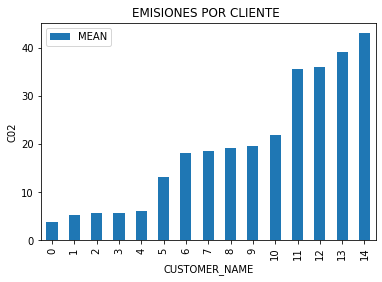

In [16]:
import matplotlib.pyplot as plt
ordenados.plot(kind='bar')
plt.xlabel('CUSTOMER_NAME')
plt.ylabel('C02')
plt.title('EMISIONES POR CLIENTE ')

plt.show()

In [17]:
menores = pd.DataFrame()

menores["SPIFFY"] = SPIFFY["CO2"]
menores["MERCIFUL"] = MERCIFUL["CO2"]
menores["KIND"] = KIND["CO2"]
menores["TOUGH"] = TOUGH["CO2"]
menores["SCEPTICAL"] = SCEPTICAL["CO2"]


<AxesSubplot:xlabel='Date'>

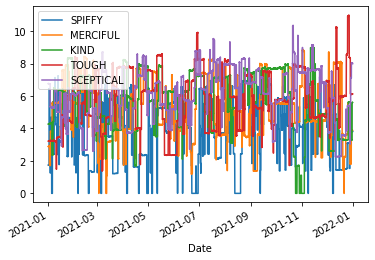

In [18]:
menores.plot()

In [19]:
mayores = pd.DataFrame()

mayores["DRAMATIC"] = DRAMATIC["CO2"]
mayores["DELIGHTFUL"] = DELIGHTFUL["CO2"]
mayores["GLEAMING"] = GLEAMING["CO2"]
mayores["JUDICIOUS"] = JUDICIOUS["CO2"]
mayores["BUSY"] = BUSY["CO2"]

<AxesSubplot:xlabel='Date'>

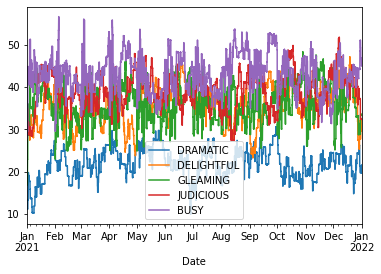

In [20]:
mayores.plot()